In [1]:
import cv2

In [3]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)
        
        
        if faces is ():
            return None
        for (x,y,w,h) in faces :
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face
    cap = cv2.VideoCapture(0)
    img_id = 60
    
    while True :
        ret,frame = cap.read()
        if face_cropped(frame ) is not None :
            img_id+=1
            face = cv2.resize(face_cropped(frame),(200,200))
            face =cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
#             file_name_path ="data/" + "Mukul." + str(img_id)+".jpg"
            file_name_path ="images_for_visualisation/"  + str(img_id) +".jpg"
            cv2.imwrite(file_name_path , face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Cropped_Face" , face )
#             if cv2.waitKey(1)==13 or int(img_id)==150 :
            if cv2.waitKey(1)==13 or int(img_id)==80 :
                break
                
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting Samples Is Completed")

generate_dataset()

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\hp\AppData\Local\Temp\ipykernel_20632\77567380.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [2]:
def my_label(image_name):
    name = image_name.split('.')[-3] # as my name is Ankit.1.jpg , so , it will jump three values and get the core name i.e Ankit
# #     FOR ONLY TWO DATA 
#     if name =="Aditya":
#         return np.array([1,0])
    
#     elif name == "Ankit":
#         return np.array([0,1])

# # FOR THREE DATA
    
    
    if name =="Ankit":
        return np.array([1,0,0,0])
    elif name =="Aditya":
        return np.array([0,1,0,0])
    elif name =="Sujeet":
        return np.array([0,0,1,0])
    elif name =="Mukul" :
        return np.array([0,0,0,1])
    

In [3]:
!pip install tqdm

In [4]:
# Creation of data into array i.e image into numpy array

import os 
from random import shuffle 
from tqdm import tqdm


In [5]:
import numpy as np

In [6]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path = os.path.join("data",img)
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data

In [7]:
data= my_data()

100%|███████████████████████████████████████████████████████████████████████████████| 517/517 [00:00<00:00, 578.49it/s]


In [8]:
train = data[:420] 
test = data[420:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train =[i[1] for i in train]

X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test =[i[1] for i in test]


(420, 50, 50, 1)
(97, 50, 50, 1)


In [9]:
import numpy as np

y_train = np.array(y_train)
print(y_train.shape)


(420, 4)


In [10]:
import numpy as np

y_test = np.array(y_test)
print(y_test.shape)


(97, 4)


In [11]:
! pip install tflearn

In [12]:
# CREATION OF MODEL 

import tensorflow as tf 
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [13]:
# convnet = input_data(shape=[50, 50, 1])
convnet = tflearn.input_data(shape=[50, 50, 1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 4 , activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=20, validation_set=(X_test, y_test), show_metric=True, run_id='FRS')



Training Step: 139  | total loss: 0.80304 | time: 0.751s
| Adam | epoch: 020 | loss: 0.80304 - acc: 0.9465 -- iter: 384/420
Training Step: 140  | total loss: 0.72300 | time: 1.916s
| Adam | epoch: 020 | loss: 0.72300 - acc: 0.9519 | val_loss: 0.00825 - val_acc: 1.0000 -- iter: 420/420
--


In [14]:
def data_for_visualisation():
    Vdata = []
    for img in tqdm(os.listdir("images_for_visualisation")):
        path = os.path.join("images_for_visualisation", img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50, 50))
        Vdata.append([np.array(img_data), img_num])
    
    shuffle(Vdata)
    return Vdata

In [15]:
Vdata = data_for_visualisation()

100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 849.68it/s]


In [16]:
!pip install matplotlib

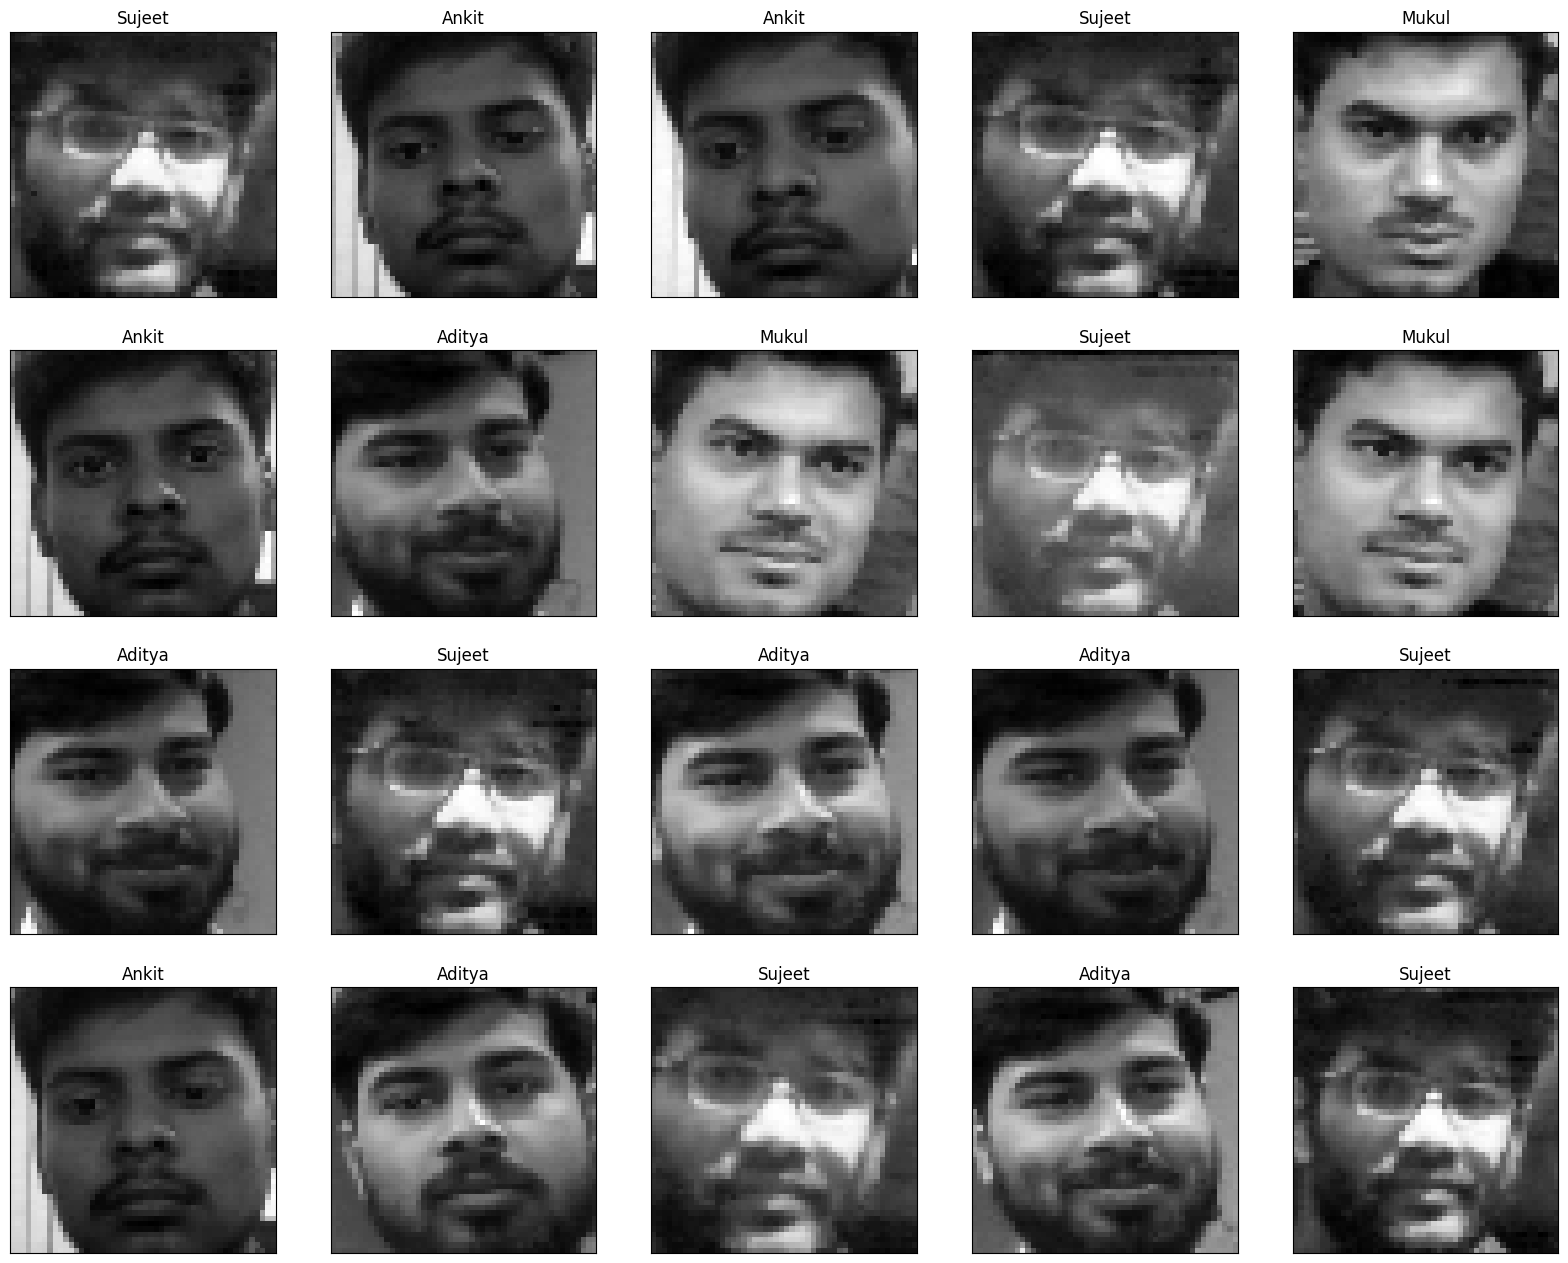

In [17]:
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(20,20))
for num , data in enumerate(Vdata[:20]):
    img_data=data[0]
    y=fig.add_subplot(5,5,num+1)
    image =img_data
    data=img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
#     [0.8,0.1,0.1]
#     [0.2,0.6,0.2]
#     [0.1,0.2,0.7]
    
    if np.argmax(model_out)==0:
        my_label = 'Ankit'
    elif np.argmax(model_out)==1:
        my_label ='Aditya'
    elif np.argmax(model_out)==2:
        my_label ='Sujeet'
    else:
        my_label ='Mukul'
        
        
    y.imshow(image,cmap='gray')
    plt.title(my_label)
    
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


In [ ]:
FROM HERE TRYING TO CONVERT THIS CODES INTO LIVE FORMAT WITHOUT SAVING INTO images_for_visualisation

In [18]:
def draw_label(img,text,pos,bg_color):
    
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
    
    end_x = pos[0]+text_size[0][0]+ 2 
    end_y = pos[1]+text_size[0][1]- 2 
    
    cv2.rectangle(img,pos,(end_x ,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)


In [19]:
import cv2

In [20]:
cap = cv2.VideoCapture(0)

In [21]:
haar =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [22]:
def live_image_cam(img):
    coods = haar.detectMultiScale(img)
    return coods

In [ ]:
NOW CONVERTING THE CODES TO WRITE INTO EXCEL

In [23]:
import os

In [24]:
! pip install pandas 

In [25]:
import pandas as pd 

In [26]:
# CALLING data_for_visualisation
data_attend = data_for_visualisation()

100%|████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 1381.39it/s]


In [27]:
! pip install openpyxl

In [28]:
!pip install opencv-python
!pip install tensorflow
!pip install pandas
!pip install xlsxwriter


In [29]:
import datetime 

In [30]:
import cv2
import tensorflow as tf
import pandas as pd

# # Load your trained model
# model = tf.keras.models.load_model('path/to/your/model.h5')

# Set up the webcam and Excel writer
cap = cv2.VideoCapture(0)  # 0 for default webcam
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Create an Excel writer
writer = pd.ExcelWriter('predictions.xlsx', engine='xlsxwriter')


# Define class labels
class_labels = ["Ankit", "Aditya" , "Sujeet" , "Mukul"]

while True:
    ret, frame = cap.read()

    coods = live_image_cam(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

    for x, y, w, h in coods:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

        # Perform object classification on the resized object region
        obj_img = frame[y:y+h, x:x+w]
        obj_img = cv2.resize(obj_img, (50, 50))
        obj_gray = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)
        obj_gray = np.uint8(obj_gray)  # Ensure image depth is CV_8U

        obj_input = np.expand_dims(obj_gray, axis=0)
        obj_input = np.expand_dims(obj_input, axis=-1)  # Add channel dimension

        res = model.predict(obj_input)[0]
#         print(res)


        # Convert the prediction to a DataFrame
        prediction_df = pd.DataFrame(res, columns=['Prediction'])
#         print(prediction_df)

        # Write the prediction to the Excel sheet
#         prediction_df.to_excel(writer, index=False, sheet_name='Predictions')
        

        # Display the result on the frame
        predicted_class_index = np.argmax(res)
#         print(predicted_class_index)
        predicted_class_label = class_labels[predicted_class_index]
#         print(predicted_class_label)
        
        # Write the prediction to the Excel sheet
        prediction_df['Prediction'] = predicted_class_label
        prediction_df['Present/Absent'] = 'Present'  # Assuming the person is present
        
        prediction_df['Date of Attendance'] = datetime.date.today()
        prediction_df['Entry Time'] = datetime.datetime.now().time()

        prediction_df.to_excel(writer, index=False, sheet_name='Predictions')

        
        
         
        cv2.putText(frame, 'Prediction: {}'.format(predicted_class_label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Webcam', frame)

    # Exit the loop if 'x' is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break


writer.close()

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()